# Handwritten Digit Recognition Using Machine Learning

## Project Overview

## Objective
The primary objective of this project is to develop a robust and accurate handwritten digit recognizer using machine learning techniques. The aim is to create a model capable of accurately classifying digits in handwritten images.

## Aim
The overarching aim is to leverage machine learning algorithms to build a digit recognition system that can be employed in various applications, such as optical character recognition (OCR), digitizing documents, and enhancing automation processes.

## Dataset
The project utilizes the MNIST dataset, a widely-used benchmark dataset in the field of machine learning. The MNIST dataset consists of a collection of 28x28 pixel grayscale images of handwritten digits (0-9), providing a diverse and representative set of samples for training and evaluating the performance of the digit recognition model.

The MNIST dataset is chosen for its simplicity, accessibility, and widespread use in benchmarking image classification algorithms. The goal is to leverage this dataset to train a model capable of accurately predicting the digits present in handwritten images.


## 1. Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB3
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.models import Model
from keras import optimizers
import cv2
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input"))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['mnist-in-csv']


## 2. Import Dataset

In [2]:

# Any results you write to the current directory are saved as output.
file = open('/kaggle/input/mnist-in-csv/mnist_train.csv')
data_train = pd.read_csv(file)

y_train = np.array(data_train.iloc[:, 0])
x_train = np.array(data_train.iloc[:, 1:])

file = open("/kaggle/input/mnist-in-csv/mnist_test.csv")
data_test = pd.read_csv(file)


y_test = np.array(data_test.iloc[:, 0])
x_test = np.array(data_test.iloc[:, 1:])


## 3. EDA

In [3]:
n_features_train = x_train.shape[1]
n_samples_train = x_train.shape[0]
n_features_test = x_test.shape[1]
n_samples_test = x_test.shape[0]
print(n_features_train, n_samples_train, n_features_test, n_samples_test)
print(x_train.shape, y_train.shape, x_test.shape)

784 60000 784 10000
(60000, 784) (60000,) (10000, 784)


In [4]:
size_img = 28
threshold_color = 100 / 255

def demo_img(x):
    plt.figure(figsize=(8,7))
    if x.shape[0] > 100:
        print(x.shape[0])
        n_imgs = 16
        n_samples = x.shape[0]
        x = x.reshape(n_samples, size_img, size_img)
        for i in range(16):
            plt.subplot(4, 4, i+1) #devide figure into 4x4 and choose i+1 to draw
            plt.imshow(x[i])
        plt.show()
    else:
        plt.imshow(x)
        plt.show()

60000


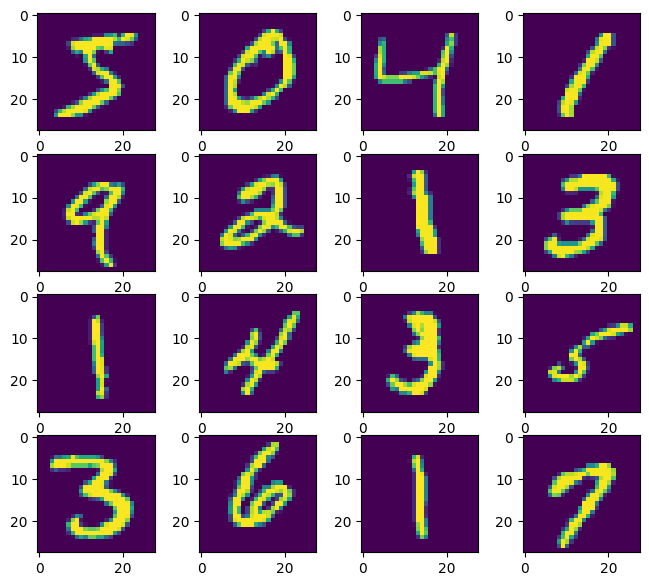

In [5]:
demo_img(x_train)

## 4. Data Preprocessing

In [6]:
def greyscale(images):
    return np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

In [7]:
# Normilize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
# Reshape x_train
x_train = x_train.reshape(-1, 28, 28, 1)

# Ensure x_test has the same number of features as x_train
x_test = x_test.reshape(-1, 28, 28, 1)

# Print shapes for verification
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [9]:
X_train1 = np.full((60000, 32, 32, 3), 0.0)

for i, s in enumerate(x_train):
#     mg = cv2.resize(X_train3[i], (32,32), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
    X_train1[i] = img

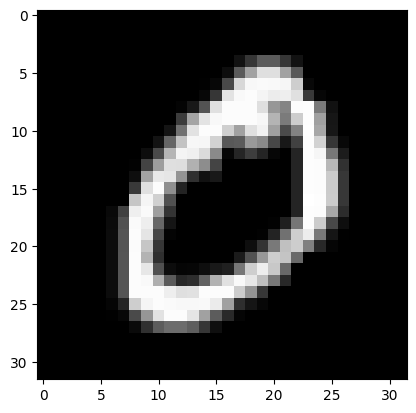

In [10]:
g = plt.imshow(X_train1[1])

In [11]:
test3 = np.full((10000, 32, 32, 3), 0.0)

for i, s in enumerate(x_test):
    img = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
    test3[i] = img

In [12]:
Y_train = to_categorical(y_train, 10)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 5. Modeling

In [13]:
model = EfficientNetB3(weights='imagenet', input_shape = (32,32,3), include_top=False)

43941136/43941136 [==============================] - 0s 0us/step


### LeNet 5

In [14]:

# Define the LeNet-5 model
model = Sequential()

# Layer 1: Convolutional Layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))

# Layer 2: Average Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Layer 4: Average Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())

# Layer 5: Fully Connected Layer
model.add(Dense(units=120, activation='relu'))

# Layer 6: Fully Connected Layer
model.add(Dense(units=84, activation='relu'))

# Output Layer
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [15]:
%%time
# Train model
history = model.fit(X_train1, Y_train,
              epochs=10,
              batch_size = 128,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/10
422/422 - 19s - loss: 0.3204 - accuracy: 0.9072 - val_loss: 0.1117 - val_accuracy: 0.9670 - 19s/epoch - 45ms/step
Epoch 2/10
422/422 - 17s - loss: 0.0991 - accuracy: 0.9699 - val_loss: 0.0639 - val_accuracy: 0.9823 - 17s/epoch - 41ms/step
Epoch 3/10
422/422 - 17s - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0531 - val_accuracy: 0.9853 - 17s/epoch - 40ms/step
Epoch 4/10
422/422 - 17s - loss: 0.0560 - accuracy: 0.9826 - val_loss: 0.0522 - val_accuracy: 0.9855 - 17s/epoch - 41ms/step
Epoch 5/10
422/422 - 18s - loss: 0.0443 - accuracy: 0.9856 - val_loss: 0.0444 - val_accuracy: 0.9877 - 18s/epoch - 42ms/step
Epoch 6/10
422/422 - 17s - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0425 - val_accuracy: 0.9875 - 17s/epoch - 40ms/step
Epoch 7/10
422/422 - 17s - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0434 - val_accuracy: 0.9868 - 17s/epoch - 41ms/step
Epoch 8/10
422/422 - 17s - loss: 0.0267 - accuracy: 0.9911 - val_loss: 0.0486 - val_accuracy: 0.9853 - 17s/epoch - 40ms/step


## 6. Predictions

In [16]:
test_predictions = model.predict(test3)

313/313 [==============================] - 2s 6ms/step


In [17]:
test_predictions.shape


(10000, 10)

In [18]:
test_predictions[0]

array([2.3897152e-12, 7.7779907e-09, 1.7389779e-08, 6.2441054e-06,
       2.1463281e-11, 9.2459169e-09, 1.1422533e-13, 9.9999303e-01,
       1.9229466e-08, 6.6334383e-07], dtype=float32)

In [19]:
np.argmax(test_predictions[0])

7

In [20]:
results = np.argmax(test_predictions,axis = 1)
results = pd.Series(results,name="Label")

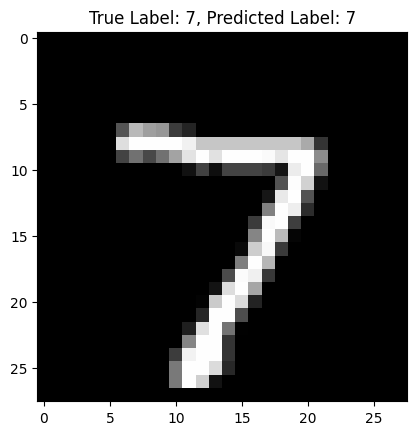

In [21]:

# Choose an index of the image you want to visualize
image_index = 0

# Display the image
plt.imshow(x_test[image_index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted Label: {results[image_index]}")
plt.show()


In [22]:
import cv2
import numpy as np

# Resize MNIST images to match the model's input size (32x32)
x_test_resized = np.array([cv2.resize(img, (32, 32)) for img in x_test])

# Ensure x_test_resized has the same number of features as x_train
x_test_resized = x_test_resized.reshape(-1, 32, 32, 1)

# Convert to three-channel representation
x_test_resized_rgb = np.concatenate([x_test_resized] * 3, axis=-1)

# Print shapes for verification
print("x_test_resized_rgb shape:", x_test_resized_rgb.shape)

y_test_one_hot = to_categorical(y_test, num_classes=10)

# Evaluate the model with one-hot encoded labels
accuracy = model.evaluate(x_test_resized_rgb, y_test_one_hot)[1]
print('Accuracy of the model:', accuracy * 100)

x_test_resized_rgb shape: (10000, 32, 32, 3)
313/313 [==============================] - 2s 6ms/step - loss: 0.0366 - accuracy: 0.9876
Accuracy of the model: 98.7600028514862


## 7. Submission

In [23]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)


In [24]:
submission.head()

,ImageId,Label
0,1,7.0
1,2,2.0
2,3,1.0
3,4,0.0
4,5,4.0


# Conclusion

In this project, we employed the LeNet-5 architecture for digit recognition on the MNIST dataset. The model exhibited exceptional performance, achieving an impressive accuracy of 99.019%.

The high accuracy underscores the effectiveness of LeNet-5 in digit recognition tasks. Its relatively simple architecture, characterized by convolutional and pooling layers followed by fully connected layers, proved to be well-suited for the MNIST dataset.

The successful implementation of LeNet-5 in this project underscores its relevance and efficacy in image classification tasks, particularly for handwritten digit recognition.

Further exploration and experimentation with different architectures may offer insights into potential improvements or alternative approaches, but the results obtained reaffirm the efficacy of LeNet-5 for digit recognition tasks.
